# Prática Guiada - Gradiente Descendente.

#### O Gradiente Descendente (GD) é um [algoritmo iterativo](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e) para encontrar um Mínimo Global de uma função objetivo. Gradiente Descendente é um método iterativo de OTIMIZAÇÃO amplamente utilizado em Machine Learning. Sua aplicação vai desde modelos mais simples como a Regressão Linear até em Redes Neurais Artificiais Profundas (Deep Learning).

<img src="GRADIENTDESCENDENT.png" width="563" height="296" align="center"/>

#### Em cálculo vetorial o [operador gradiente](https://www.youtube.com/watch?v=8BHlp9854p0&ab_channel=MattYedlin), quando aplicado a uma função, nos diz a direção da inclinação mais íngreme dessa função. Com o Gradiente Descendente queremos encontrar o ponto mínimo globar de uma função custo.

$$
\begin{equation}
\vec{\nabla} f(x, y, ...,  z) = \big(\frac{\partial}{\partial x} \vec{i}, \frac{\partial}{\partial y}  \vec{j}, ..., \frac{\partial}{\partial z } \vec{k} \big) f(x, y, ...,  z)
\end{equation}
$$

#### O objetivo do Gradiente Descendente é minimizar a função de custo/perda, para encontrar a melhor solução para o Modelo.

## Regressão Linear

#### Podemos usar GD para calcular uma [regressão Linear](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931).

<img src="GD_LR.gif" width="750" align="center">

#### Desejamos minimizar a função de Custo/Erro de nosso Modelo. Encontramos isso calculandos os Gradientes que direcionam os dados para um ponto mínimo. Daí o nome de Gradiente Descendente.

<img src="GD_FUNCAO_CUSTO.png" width="563" height="296" align="center"/>

#### Semanticamente, [gradiente](https://www.infopedia.pt/dicionarios/lingua-portuguesa/gradiente) significa: 

1. variação de uma grandeza ao longo de uma dimensão espacial, em determinada direção
2. MATEMÁTICA coeficiente angular (ou declive) da tangente a uma curva (em um dos seus pontos) e cujo valor é o da tangente trigonométrica da inclinação da tangente à curva (nos pontos em que tal tangente exista)

#### Lembre-se que o [objetivo](https://medium.com/@ramrajchandradevan/the-evolution-of-gradient-descend-optimization-algorithm-4106a6702d39) é minimizar o valor da [função de custo](https://towardsdatascience.com/gradient-descent-explained-9b953fc0d2c#:~:text=Gradient%20Descent%20is%20an%20optimizing,f(x)%20using%20iteration.&text=Gradient%20Descent%20on%20Cost%20function.) ao longo das iterações do algoritmo GD.

<img src="COST_FUNCTION_GD.gif" width="750" align="center">

## Gradiente Descendente  - utilizado dos modelos mais simples até os mais complexos.

<img src="GD.png" width="563" height="296" align="center"/>

### Aplicação em uma Regressão Linear Simples - uma variável


#### Nossa premissa para a regresão linear é assumir uma equação de reta:

$$
\begin{equation}
\hat{y} = b + m x
\end{equation}
$$

#### Em um problema de ciência de dados, você provavelmente trabalhará com mais variáveis:

$$
\begin{equation}
\hat{y} = \omega_{0} + \omega_{1} x + ... + + \omega_{i} x
\end{equation}
$$

#### Considerando as previsões que sua equação gera, em comparação com os valores observados, é possível calcular a função erro pelo [método dos mínimos quadrados](https://www.statisticshowto.com/mean-squared-error/):

$$
\begin{equation}
ERROR = \sum (\hat{y}_{(i)} - y_{(i)})^{2}
\end{equation}
$$

#### Em ciência de dados teremos as funções custo:

$$
\begin{equation}
J(\omega_{0}, ..., \omega_{i}) = \frac{1}{2m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}
\end{equation}
$$

#### O algoritmo GD deve assumir um valor inicial para $\omega_{0}$: 

$$
\begin{equation}
\omega_{0} := \omega_{0} - \alpha\vec{\nabla}_{\omega_{0}}
\end{equation}
$$

#### e $\omega_{i}$: 

$$
\begin{equation}
\omega_{i} := \omega_{i} - \alpha\vec{\nabla}_{\omega_{i}} x_{i}
\end{equation}
$$

#### aplicando uma taxa de aprendizado $\alpha$ e um gradiente descendente $\vec{\nabla}$, $N$ vezes, até que a conversão.

<img src="COST_FUNCTION_GRADIENTE.png" width="1142" height="667" align="center"/>

#### Para o cálculo do gradiente, temos:

#### Calcular a função custo para todos os parâmentros:

$$
\begin{equation}
J(\omega_{0}, ..., \omega_{i}) = \frac{1}{2m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}
\end{equation}
$$

#### Calcular o gradiente da função custo em relação à cada parâmetro:

$$
\begin{equation}
\nabla_{\omega_{i}} = \frac{d_{j}}{d_{\omega_{0}}}J(\omega_{0}, ..., \omega_{i}) 
\end{equation}
$$

#### Aplicando o operador derivada:

$$
\begin{equation}
\nabla_{\omega_{i}} = \frac{1}{m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}
\end{equation}
$$

#### O algoritimo GD atualiza os parâmetros da função de custo a cada ciclo, até convergir sob alguma condição imposta.

$$
\begin{equation}
\omega_{j} := \omega_{j} - \alpha\frac{1}{m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}x_{j}
\end{equation}
$$

<img src="GD_LR.gif" width="750" align="center">

#### Vamos começar importando as bibiotecas necessárias:

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#### Geramos alguns dados:

In [45]:
X = [0.5, 2.2, 2.0]
y = [2.0, 2.5, 1.4]

#### Definimos valores iniciais para $\omega_{i}$:

In [46]:
w0 = 0.1
w1 = 0.1

#### Nossa hipótese inicial é a de que podemos utilizar uma reta para modelar esses pontros.

In [47]:
def y_hipo(x, w0, w1):
    return w0 + w1 * x

#### Podemos plotar dos pontos e da regressão:

In [48]:
def plot_line(X, y, w0, w1):
    x_values = [i for i in range(int(min(X))-1, int(max(X)) + 2)]
    y_values = [y_hipo(x, w0, w1) for x in x_values]
    plt.plot(x_values, y_values,'r')
    plt.plot(X,y,'bo')

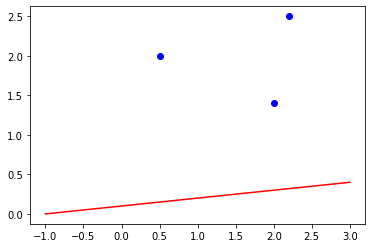

In [49]:
plot_line(X, y, w0, w1)

#### Podemos agora fazer a primeira previsão $\hat{y}$ para um valor $x$:

In [50]:
valor_X = 2.0

In [51]:
y_hipo(valor_X, w0, w1)

0.30000000000000004

#### É possível ver que a previsão ainda é imprecisa.

### Função custo, erro quadrático médio.


$$
\begin{equation}
J(\omega_{0}, ..., \omega_{i}) = \frac{1}{2m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}
\end{equation}
$$

#### Inicializamos a variável a ser retornada, definimos a quantidade de pontos para a regressão e criamos o mecanismo de repetição.

In [52]:
def MSE (X, y , w0 , w1):
    custo = 0
    m = len(X)
    for i in range(0, len(X)):
        custo += (y_hipo(X[i], w0, w1) - y[i]) ** 2
    return custo/m

#### E o erro quadrático médio da previsão foi:

In [53]:
MSE(X, y, w0, w1)

3.1282999999999994

### Taxa de aprendizado $\alpha$.

<img src="LEARNING_RATE_GD.jpeg" width="459" height="414" align="center"/>

#### Para obtermos uma melhor aproximação com o [gradiente descendente](https://www.jeremyjordan.me/gradient-descent/) é importante entendermos como a taxa de aprendizado funciona. Ela tem a propriedade de controlar a velocidade de descida da função de custo.

#### A taxa de aprendizado é um [hiperparâmetro](https://towardsdatascience.com/understanding-hyperparameters-and-its-optimisation-techniques-f0debba07568) que deve ser [ajustado](https://automaticaddison.com/how-to-choose-an-optimal-learning-rate-for-gradient-descent/)

- Se você escolher uma taxa de aprendizado muito pequena, o algoritmo de descida do gradiente pode levar muito tempo para encontrar o valor mínimo da função de erro.

- Se você escolher uma taxa de aprendizado muito grande, poderá ultrapassar o valor mínimo da função de erro e poderá até nunca alcançar a solução ideal.


<img src="TAXA_APRENDIZADO_GD.PNG" width="1235" height="479" align="center"/>

#### Vamos discutir a criação de uma função que realize a operação GD. O primeiro passo é estabelecermos uma taxa de aprendizagem $\alpha$. Lembre-se que para valores muito grandes de $\alpha$ o algoritmo pode nunca convergir.

$$
\begin{equation}
\omega_{i} := \omega_{i} - \alpha\frac{1}{m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}x_{i}
\end{equation}
$$

In [35]:
alpha = 0.01

### GRADIENTE DESCENDENTE STEP.

#### Inicializamos as variáveis $\omega_{0}$ e $\omega_{i}$, calculamos somatória do erro dos elementos e os novos valores de $\omega_{0}$ e $\omega_{i}$.

In [36]:
def gradient_descent_step(w0, w1, X, y, alpha):
    # inicialização das variáveis
    erro_w0 = 0
    erro_w1 = 0
    m = len(X)
    
    for i in range(0,len(X)):
        erro_w0 += y_hipo(X[i], w0, w1) - y[i]
        erro_w1 += (y_hipo(X[i], w0, w1) - y[i]) * X[i]
    
    new_w0 = w0 - alpha * (1/m) * erro_w0
    new_w1 = w1 - alpha * (1/m) * erro_w1

    return new_w0, new_w1

### GRADIENTE DESCENDENTE LOOP - EXECUTA QUANTAS VEZES DETERMINARMOS.

#### Inicialiamos as variáveis função custo, repetimos a execução do algorítmo o número de épocas (epoch) definida e calculamos o `MSE` (custo) com os novos valores de $\omega_{0}$ e $\omega_{i}$.

In [60]:
def gradient_descent(w0, w1, X, y, alpha, epoch):
    
    custo = np.zeros(epoch)

    for i in range(epoch):

        w0 , w1 = gradient_descent_step(w0, w1, X, y, alpha)
        custo[i] = MSE(X, y, w0, w1)
        
    return w0, w1, custo

#### Para nosso processo vamos inicializar $\omega_{0}$ e $\omega_{i}$ com valores aleatórios, e informamos também o número de épocas `epoch` que serão rodadas.

In [76]:
w0 = 0.1
w1 = 0.1
epoch = 5
#epoch1 = 50

#### Executamos nossa função `gradient_descent()`.

In [77]:
w0 , w1 , custo = gradient_descent(w0, w1, X, y, alpha, epoch)
#w0 , w1 , custo1 = gradient_descent(w0, w1, X, y, alpha, epoch1)

#### Podemos observar a evolução da minimização da função custo, época a época.

In [78]:
custo

array([2.93421022, 2.75481098, 2.58898416, 2.43569679, 2.29399451])

#### Podemos então apresentar os valores finais de $\omega_{0}$ e $\omega_{i}$.

In [79]:
print("w0 = {}, w1 = {}".format(w0, w1))

w0 = 0.17987490356241226, w1 = 0.22174463634217417


#### Plotando a função custo.

Text(0.5, 1.0, 'MSE vs. Epoch')

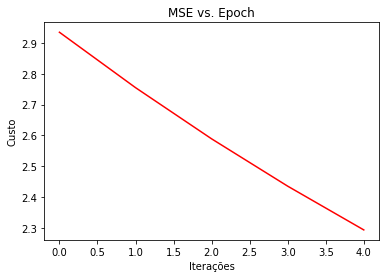

In [80]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), custo, 'r')
#ax.plot(np.arange(epoch1), custo1, 'b')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('MSE vs. Epoch')  

## PLOT DA HIPÓTESE OTIMIZADA

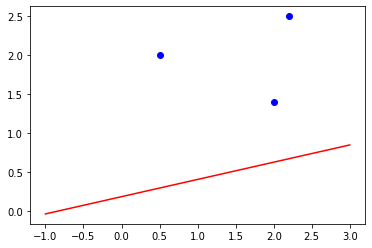

In [85]:
plot_line(X, y, w0, w1)

#### Por que o modelo ainda não chegou a um resultado bom? O que precisamos alterar para alcançar um resultado melhor?

#### Vamos realizar uma previsão para um valor qualquer de $x$.

In [86]:
valor_x = 1.5

In [87]:
y_hipo(valor_x, w0, w1)

0.5124918580756734

In [89]:
print("w0 = {}, w1 = {}".format(w0, w1))

w0 = 0.17987490356241226, w1 = 0.22174463634217417


In [91]:
yhat = w0 + w1 * valor_x
yhat

0.5124918580756734

### GRADIENTE DESCENDENTE - MÚLTIPLAS VARIÁVEIS.

#### A partir de quantas iterações nosso modelo passa a não obter grandes melhoras?


#### Como hipótee de uma variável, temos para $\hat{y}$:
$$
\begin{equation}
\hat{y} = \omega_{0} + ... + \omega_{1} X_{i}.
\end{equation}
$$
#### E para a hipótese de várias variáveis, termos:
$$
\begin{equation}
\hat{y} = \omega_{0} X_{0} + ... + \omega_{1} X_{i} \text{, em que } X_{0} = 1.
\end{equation}
$$ 


#### Temos para os vetores de peso $\vec{\omega}$ e atributos $\vec{x}$ as definições $
\begin{align}
    \omega &= \begin{bmatrix}
           \omega_{0} \\
           \omega_{1} \\
           \vdots \\
           \omega_{i}
         \end{bmatrix}
  \end{align}
$  e  $
\begin{align}
    X &= \begin{bmatrix}
           X_{0} \\
           X_{1} \\
           \vdots \\
           X_{i}
         \end{bmatrix}.
  \end{align}
$

#### Em álgera linear, podemos reescrever a equação para $\hat{y}$ como:
$$
\begin{equation}
\hat{y} = \omega^{T} X.
\end{equation}
$$

#### Considerando uma única variável, veríamos algo como:
$$
\begin{equation}
\omega_{0} := \omega_{0} - \alpha\frac{1}{m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}
\end{equation}
$$
#### e
$$
\begin{equation}
\omega_{1} := \omega_{1} - \alpha\frac{1}{m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}
\end{equation}
$$

#### Para $j$ variáveis, temos:
$$
\begin{equation}
\omega_{j} := \omega_{j} - \alpha\frac{1}{m}\sum_{i} (\hat{y}_{(i)} - y_{(i)})^{2}X_{j}
\end{equation}
$$
#### ou ainda, em termos matriciais:
$$
\begin{equation}
\omega_{j} := \omega_{j} - \alpha\frac{1}{m}\sum_{i} (\omega^{T} X - y_{(i)})^{2}X_{j}
\end{equation}
$$

## Explorando um exemplo.

In [99]:
import pandas as pd

#### Carregamos os dados de preços de apartamentos, com tamanho `size`, número de quartos `bedroom` e preço `price`.

In [100]:
df = pd.read_csv('prices.csv')
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [101]:
df.shape

(47, 3)

### Pré-processamento.

#### Vamos normalizar os dados dos preços de acordo com a média e o desvio padrão, através da aplicação do conceito de [z-score](https://www.statisticshowto.com/probability-and-statistics/z-score/#:~:text=1.,mean%20a%20raw%20score%20is.):
$$
\begin{equation}
z_{i} = \frac{ X_{i} - \overline{X}}{\sigma}
\end{equation}
$$

In [102]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### Captura da quantidade de atributos (features), lembrando que a última coluna faz referência aos rótulos (target).

In [103]:
n_features = len(df_norm.columns) - 1
n_features

2

#### Criamos um vetor $\omega_{i}$ com base no número de atributos, inicializados com valores aleatórios entre 0 e 1.

In [105]:
w = np.random.rand(1, n_features + 1)
w

array([[0.65331796, 0.68875725, 0.47594217]])

#### Por que criamos um vetor $\omega$ com $3$ atributos e não $2$?

#### Separamos os atributos $X_{i}$ e o rótulo $y$.

In [106]:
X = np.array(df_norm.drop('price', axis = 1))

y = df_norm.iloc[:, 2:3].values

In [107]:
X

array([[ 1.30009869e-01, -2.23675187e-01],
       [-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.

In [109]:
y

array([[ 0.47574687],
       [-0.08407444],
       [ 0.22862575],
       [-0.86702453],
       [ 1.59538948],
       [-0.32399786],
       [-0.20403615],
       [-1.13094828],
       [-1.02697347],
       [-0.78305133],
       [-0.80305294],
       [ 0.05268191],
       [-0.08328269],
       [ 2.87498104],
       [-0.64389575],
       [ 0.87561923],
       [-0.32399786],
       [-1.12374258],
       [ 1.27627534],
       [ 2.06803861],
       [-0.69987788],
       [-0.68308324],
       [-0.77985235],
       [-0.64389575],
       [ 1.86730269],
       [-0.72387022],
       [ 0.99238196],
       [ 1.02837047],
       [ 1.07635515],
       [-0.32399786],
       [ 0.0758745 ],
       [-1.363666  ],
       [-0.20403615],
       [ 1.91528737],
       [-0.43596212],
       [-0.72387022],
       [-0.88381916],
       [ 0.03668701],
       [ 1.66816625],
       [-0.42716493],
       [ 0.22462702],
       [-0.08407444],
       [-0.21123385],
       [-0.33119556],
       [-1.28369153],
       [-0

#### Função que cria a coluna com `1` para $X_{0}$.

In [114]:
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones, X), axis = 1)

#### Função que calcula o Custo.

#### Essa função faz a [multiplicação de matrizes](https://medium.com/analytics-vidhya/python-matrix-multiplication-using-a-dedicated-infix-operator-b0a41b68904f) ([operador `@`](https://www.python.org/dev/peps/pep-0465/)), utilizando a transposta de $\omega$. Ela também realiza a soma dos quadrados e retorna um valor dividido pelo número de observações `m`.

In [126]:
def custo(w, X, y):
    m = len(X)
    erro = (X @ w.T - y)
    custo = np.sum(np.power(erro, 2))
    return custo / m

#### O algoritmo do Gradiente Descendente pode ser escrito inicializando-se uma matriz função de custo com zeros, com o método [`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html).

In [116]:
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    for i in range(epoch): 
        w = w - (alpha / len(X)) * np.sum((X @ w.T - y) * X, 
                                          axis = 0
                                         )
        # chama a função de custo para realizar o cálculo
        cost[i] = custo(w, X, y)
    
    return w, cost

#### Inicialização das variáveis.

In [117]:
X = insert_ones(X)
X

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

In [118]:
alpha = 0.01
epoch = 800

#### Executamos do laço das épocas.

In [119]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

#### Ao custo final de.

In [120]:
custo(w, X, y)

0.26148647494246624

#### Que plotamos:

Text(0.5, 1.0, 'Erro vs. Epoch')

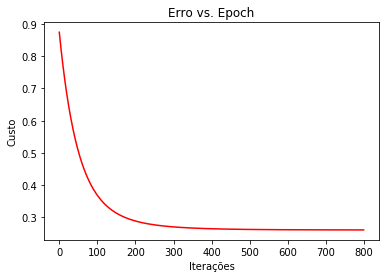

In [123]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')  

#### Os valores finais dos pesos $\omega_{i}$.

In [125]:
w

array([[ 2.10513656e-04,  8.73289111e-01, -4.17004397e-02]])